In [281]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [282]:
data = pd.read_csv('input_data.csv')

In [283]:



import pickle
pickle.dump(data,open("input.pickle","wb"))

In [284]:
data


,Unnamed: 0,Customer ID,Annual Income (k$),Spending Score (1-100)
0,0,CUS_00001,106,95
1,1,CUS_00002,124,62
2,2,CUS_00003,59,48
3,3,CUS_00004,86,27
4,4,CUS_00005,135,4
...,...,...,...,...
6495,6495,CUS_06496,62,47
6496,6496,CUS_06497,64,37
6497,6497,CUS_06498,75,24
6498,6498,CUS_06499,119,30


In [285]:
X = data.iloc[:, [2,3]].values



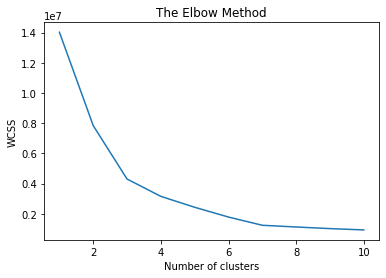

In [286]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [287]:
clusters = 5
kmeans = KMeans(n_clusters = clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 4, ..., 4, 3, 4])

In [288]:
import pickle
pickle.dump(kmeans,open("kmeans_model.pickle","wb"))

In [289]:
data.insert(4,'cluster',y_kmeans)


In [290]:
data

,Unnamed: 0,Customer ID,Annual Income (k$),Spending Score (1-100),cluster
0,0,CUS_00001,106,95,1
1,1,CUS_00002,124,62,1
2,2,CUS_00003,59,48,4
3,3,CUS_00004,86,27,3
4,4,CUS_00005,135,4,3
...,...,...,...,...,...
6495,6495,CUS_06496,62,47,4
6496,6496,CUS_06497,64,37,4
6497,6497,CUS_06498,75,24,4
6498,6498,CUS_06499,119,30,3


In [291]:
data.to_csv('customer_details.csv')

In [292]:
data[data['cluster'] == 2]['Customer ID']

7       CUS_00008
10      CUS_00011
50      CUS_00051
53      CUS_00054
55      CUS_00056
          ...    
6465    CUS_06466
6466    CUS_06467
6479    CUS_06480
6480    CUS_06481
6489    CUS_06490
Name: Customer ID, Length: 753, dtype: object

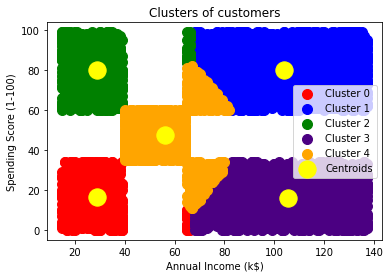

In [293]:
colors = ['red','blue','green','indigo',"orange","purple","beige","brown","gray","cyan","magenta",'pink','black']
clusters = clusters
for i in range(clusters):
    dat = data[data['cluster']==i]
    x = dat.iloc[:,2].values
    y = dat.iloc[:,3].values
    plt.scatter(x,y, s = 100, c =colors[i] , label = f'Cluster {i}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()